<a href="https://colab.research.google.com/github/CorentinMAG/AI/blob/master/polynome_deg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## 1 création du dataset

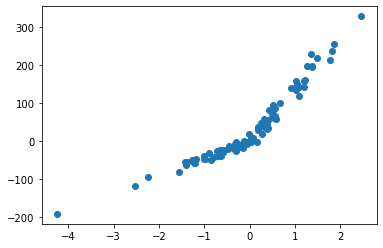

In [ ]:
x,y = make_regression(n_samples=100,n_features=1,noise=10)
y = y + abs(y/2) #pour ajouter un effet non linéaire
plt.scatter(x,y)

On va essayer de passer à un modèle polynomiale de degré 2 y=ax<sup>2</sup>+bx+c, car on vient bien qu'une simple droite ne pourra pas coller à nos données

In [ ]:
y = y.reshape(y.shape[0],1)
y.shape

(100, 1)

In [ ]:
#matrice X 
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2,X))

In [ ]:
theta = np.random.randn(3,1)
theta

array([[-1.62192575],
       [ 1.42393415],
       [ 0.27756268]])

In [ ]:
#c'est une regression linéaire, de la forme Y = F*theta
def model(X,theta):
    return X.dot(theta)

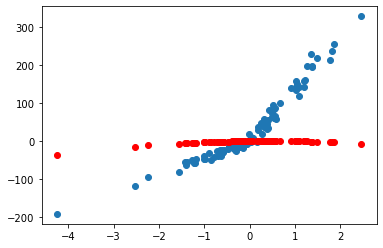

In [ ]:
plt.scatter(x,y)
plt.scatter(x,model(X,theta),c='r')

In [ ]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [ ]:
cost_function(X,y,theta)

4475.996021968989

In [ ]:
def grad(X,y,theta):
    m=len(y)
    return 1/m*X.T.dot(model(X,theta)-y)

In [ ]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta-learning_rate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history

In [ ]:
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate=0.001,n_iterations=1000)

In [ ]:
theta_final

array([[ 8.14510774],
       [56.07892512],
       [17.04269684]])

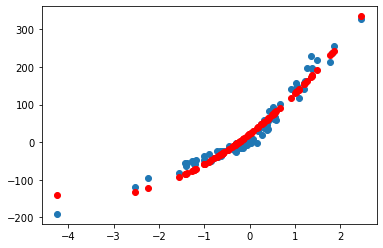

In [ ]:
prediction = model(X,theta_final)
plt.scatter(x,y)
plt.scatter(x,prediction,c='r')

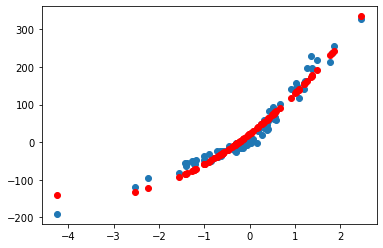

In [ ]:
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000)
prediction = model(X,theta_final)
plt.scatter(x,y)
plt.scatter(x,prediction,c='r')

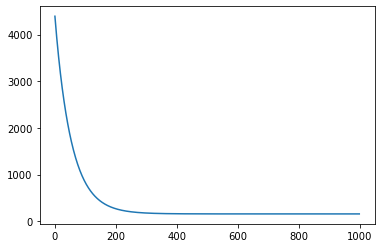

In [ ]:
plt.plot(range(1000),cost_history)

In [ ]:
#c'est le R2
def coeff_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coeff_determination(y,prediction)

0.9612374853346928